# How to create publishable netCDF data?
Remon Sadikni, remon.sadikni@uni-hamburg.de

Christopher Purr, christopher.purr@uni-hamburg.de

Stefan Kern, stefan.kern@uni-hamburg.de



# netCDF

- Unidata’s Network Common Data Form (netCDF) is a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data
- documentation: https://www.unidata.ucar.edu/software/netcdf/
- that is a standard for geoscientific array oriented data that data centers accept.

Why do we need netCDF?

- __Self-Describing__: netCDF file includes information about the data it contains.
- __Portable__: A netCDF file can be accessed by computers with different ways of storing integers, characters, and floating-point numbers.
- __Scalable__: A small subset of a large dataset may be accessed efficiently.
- __Appendable__: Data may be appended to a properly structured netCDF file without copying the dataset or redefining its structure.
- __Sharable__: One writer and multiple readers may simultaneously access the same netCDF file.
- __Archivable__: Access to all earlier forms of netCDF data will be supported by current and future versions of the software.


# Example
- NCEP Reanalysis 1 [more information about this data set at ICDC](https://www.cen.uni-hamburg.de/en/icdc/data/atmosphere/reanalysis-atmosphere/ncep.html)
- monthly mean air temperature from Jan 1948 until now on a regular rectangular grid with 1.875° resolution

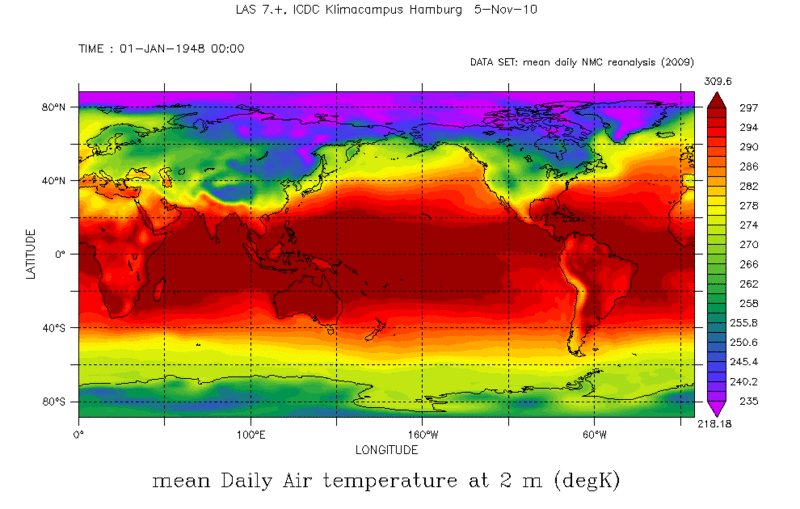

# netCDF content structure
- header with meta information (dimensions, variables, global attributes)
- each variable has attributes such as units, standard_name, etc.
- the data show up after the keyword "data:"

# netCDF content excerpt
```yaml
netcdf air2m.mon.mean {
dimensions:
        lat = 94 ;
        lon = 192 ;
        time = UNLIMITED ; // (794 currently)
variables:
        float lat(lat) ;
                lat:units = "degrees_north" ;
                lat:actual_range = 88.542f, -88.542f ;
                lat:long_name = "Latitude" ;
                lat:standard_name = "latitude" ;
                lat:axis = "Y" ;
        float lon(lon) ;
                lon:units = "degrees_east" ;
                lon:long_name = "Longitude" ;
                lon:actual_range = 0.f, 358.125f ;
                lon:standard_name = "longitude" ;
                lon:axis = "X" ;
        double time(time) ;
                time:units = "hours since 1-1-1 00:00:0.0" ;
                time:long_name = "Time" ;
                time:actual_range = 17067072., 17646384. ;
                time:standard_name = "time" ;
                time:axis = "T" ;
...

        float air(time, lat, lon) ;
                air:long_name = "Monthly Mean of Air Temperature" ;
                air:valid_range = 150.f, 400.f ;
                air:actual_range = 187.4545f, 313.3023f ;
                air:units = "degK" ;
                air:add_offset = 0.f ;
                air:scale_factor = 1.f ;
                air:missing_value = -9.96921e+36f ;
                air:level_desc = "2 m" ;                

// global attributes:
                :Conventions = "COARDS" ;
                :title = "mean daily NMC reanalysis (1958)" ;
                :history = "created 97/10/04 by Hoop (netCDF2.3)" ;
                :description = "Data is from NMC initialized reanalysis\n",
                        "(4x/day).  It consists of T62 variables interpolated to\n",
                        "pressure surfaces from model (sigma) surfaces." ;
                :platform = "Model" ;            
data:

lat = 88.542, 86.6531, 84.7532, 82.8508, 80.9473, 79.0435, 77.1394, 75.2351, 
    73.3307, 71.4262, 69.5217, 67.6171, 65.7125, 63.8079, 61.9033, ..., -88.542 ;

lon = 0, 1.875, 3.75, 5.625, 7.5, 9.375, 11.25, 13.125, 15, 16.875, 18.75, 
    20.625, 22.5, 24.375, 26.25, 28.125, 30, 31.875, 33.75, 35.625, ..., 358.125 ;

time = 1297320, 1298064, 1298760, 1299504, 1300224, 1300968, 1301688, 
    1302432, 1303176, 1303896, 1304640, 1305360, 1306104, 1306848, ..., 1900728 ;

 air =
  234.9819, 234.9284, 234.839, 234.7136, 234.6222, 234.5371, 234.4368, 
    234.3535, 234.279, 234.2307, 234.18, 234.13, 234.0648, 234.0387,..., 
    245.1625 ;
}
```

## dimensions
- In our example we have 3 dimensions **lat, lon, time**
- Here we only define the number of elements each dimension has.
- In the variables part we define the units and the actual values of these coordinates

## variables
- In our example we define variables for **lat, lon, time**
- And, we have the main variable **air** containing the 3D field of air temperature values.
- You can see on which dimensions these variables depend in the **brackets** behind the variable name.
    - e.g. for the variable lat only depends on the dimension lat
    - the variable air depends on time, lat, lon
- Each variable has **attributes** such as units, and standard_name, so that you get meta information about the content

### lat, lon
- At first we look at the spatial variable lat, which has the data type float:
    - The main attributes (the names after the colon) are
        - **units**, in this case **"degrees_north"**
        - **standard_name**: a **standardized name**, in this case **"latitude"**

```yaml
        float lat(lat) ;
                lat:units = "degrees_north" ;
                lat:actual_range = 88.542f, -88.542f ;
                lat:long_name = "Latitude" ;
                lat:standard_name = "latitude" ;
                lat:axis = "Y" ;
```                

### time
- Then, we look at the temporal variable time with data type double:
    - The main attributes are again
        - **units**, which show here a specific format:
            - it is always a **temporal interval since a certan time origin**, in this case hours since Jan 1, year 1
        - **standard_name**: in this case **"time"**
        - you can specify more attributes like in this case, but they are not as important.

```yaml
         double time(time) ;
                time:units = "hours since 1-1-1 00:00:0.0" ;
                time:long_name = "Time" ;
                time:actual_range = 17067072., 17646384. ;
                time:standard_name = "time" ;
                time:axis = "T" ;
```                

### air
- Now, the most important variable containing the 3D field of air temperature values
    - Here are some more important attributes:
        - **units**, in this case **"degK"** meaning degrees Kelvin
        - there is no standard_name, but a **long_name** showing the type of content: **"Monthly Mean of Air Temperature"**
        - and there is an additional main attribute called **missing_value**: everywhere in the 3D field where are no values, they used the missing_value **-9.96921e+36f**

```yaml
        float air(time, lat, lon) ;
                air:long_name = "Monthly Mean of Air Temperature" ;
                air:valid_range = 150.f, 400.f ;
                air:actual_range = 187.4545f, 313.3023f ;
                air:units = "degK" ;
                air:add_offset = 0.f ;
                air:scale_factor = 1.f ;
                air:missing_value = -9.96921e+36f ;
                air:level_desc = "2 m" ;
```                

## global attributes
- At the end of the header, we can specify global attributes describing **meta data for the entire data set**
- such as a description, a title, contact persons, website, references, etc.

```yaml
    // global attributes:
                :Conventions = "COARDS" ;
                :title = "mean daily NMC reanalysis (1958)" ;
                :history = "created 97/10/04 by Hoop (netCDF2.3)" ;
                :description = "Data is from NMC initialized reanalysis\n",
                        "(4x/day).  It consists of T62 variables interpolated to\n",
                        "pressure surfaces from model (sigma) surfaces." ;
                :platform = "Model" ; 
 

```                

## data
- After the header containing meta data, the **actual data values** follow after the **keyword "data:"** 
- Here you can see an excerpt of the values for lat, lon, time, and air
- Looking at the values of the time variable, you can see the amount of hours since the year 1.

```yaml
 data:

lat = 88.542, 86.6531, 84.7532, 82.8508, 80.9473, 79.0435, 77.1394, 75.2351, 
    73.3307, 71.4262, 69.5217, 67.6171, 65.7125, 63.8079, 61.9033, ..., -88.542 ;

lon = 0, 1.875, 3.75, 5.625, 7.5, 9.375, 11.25, 13.125, 15, 16.875, 18.75, 
    20.625, 22.5, 24.375, 26.25, 28.125, 30, 31.875, 33.75, 35.625, ..., 358.125 ;

time = 1297320, 1298064, 1298760, 1299504, 1300224, 1300968, 1301688, 
    1302432, 1303176, 1303896, 1304640, 1305360, 1306104, 1306848, ..., 1900728 ;

 air =
  234.9819, 234.9284, 234.839, 234.7136, 234.6222, 234.5371, 234.4368, 
    234.3535, 234.279, 234.2307, 234.18, 234.13, 234.0648, 234.0387,..., 
    245.1625 ;
}
```                

# netCDF command line tool ncdump
- ncdump 
    - for getting the ASCII output of the binary content 
    - ncdump -h filename.nc (show only header)
    - ncdump filename.nc (show entire file, that's how I created the example above)
    - documentation: https://docs.unidata.ucar.edu/nug/current/netcdf_utilities_guide.html